In [90]:
import numpy as np
import pandas as pd

# Create multiindex series

In [2]:
# wrong way to create multi index
index_val= [("cse",2019),("cse",2020),("cse",2021),("ece",2019),("ece",2020),("ece",2021)]
index_val
a=pd.Series([1,2,3,4,5,6],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(ece, 2019)    4
(ece, 2020)    5
(ece, 2021)    6
dtype: int64

In [3]:
# problem
a[0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_12256\756301884.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a[0]


1

In [4]:
multiindex= pd.MultiIndex.from_tuples(index_val)
multiindex
multiindex[0]
multiindex[1]
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021)],
           )

In [29]:
# 2. pd.MultiIndex.from_product()
proind=pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
proind

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

# create multi index object

In [31]:
a=pd.Series([1,2,3,4,5,6],index=multiindex)
a

cse  2019    1
     2020    2
     2021    3
ece  2019    4
     2020    5
     2021    6
dtype: int64

In [38]:
index=(("cse",2019),("cse",2020),("cse",2021),("ece",2019),("ece",2020),("ece",2021))
b=pd.Series([1,2,3,4,5,6],index=index)
b
b["cse"]
b

cse  2019    1
     2020    2
     2021    3
ece  2019    4
     2020    5
     2021    6
dtype: int64

# unstack : convert multiindex series into data frame

In [44]:

temp=b.unstack()
temp

,2019,2020,2021
cse,1,2,3
ece,4,5,6


# stack : convert data frame to series


In [46]:
temp.stack()

cse  2019    1
     2020    2
     2021    3
ece  2019    4
     2020    5
     2021    6
dtype: int64

# multi index herarichey 

In [80]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = proind,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

# multi column herarichey

In [57]:
np.arange(0,16).reshape(4,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [100]:
data=np.random.randint(0,10,16).reshape(4,4)
r_branch_data= pd.DataFrame(data,
                          index=[2019,2020,2021,2022], 
                          columns=pd.MultiIndex.from_product([["delhi","mumbai"],["avg_package","students"]])
                         )
                          
r_branch_data

delhi               mumbai         
     avg_package students avg_package students
2019           1        6           5        3
2020           9        4           9        6
2021           6        1           3        3
2022           2        5           1        8

# access branch data

In [101]:
r_branch_data["delhi"]

,avg_package,students
2019,1,6
2020,9,4
2021,6,1
2022,2,5


In [79]:
r_branch_data["mumbai"]
r_branch_data["delhi"]

,avg_package,students
2019,4,2
2020,2,7
2021,3,5
2022,9,3


In [102]:
# fetching columns
r_branch_data["delhi"]["avg_package"]
r_branch_data["delhi"]["students"]

r_branch_data["mumbai"]["avg_package"]
r_branch_data["mumbai"]["students"]

2019    3
2020    6
2021    3
2022    8
Name: students, dtype: int32

In [103]:
# fetching rows
r_branch_data.loc[2019]
r_branch_data.loc[2020]
r_branch_data.loc[2021]
r_branch_data.loc[2022]

delhi   avg_package    2
        students       5
mumbai  avg_package    1
        students       8
Name: 2022, dtype: int32

In [93]:
np.random.randint(0,10,32).reshape(8,4)

array([[0, 6, 0, 4],
       [7, 7, 6, 8],
       [3, 8, 3, 3],
       [3, 7, 5, 6],
       [4, 1, 5, 6],
       [9, 4, 1, 4],
       [3, 4, 3, 6],
       [9, 7, 0, 1]])

# row and columns herarichechy

In [104]:
data=np.random.randint(0,10,32).reshape(8,4)
c_branch_data= pd.DataFrame(data,
                          index=proind, 
                          columns=pd.MultiIndex.from_product([["delhi","mumbai"],["avg_package","students"]])
                         )
                          
c_branch_data

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0
    2022           1        2           7        9
ece 2019           6        3           5        7
    2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7

# stack and unstack

In [106]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [107]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

# row unstacking

In [112]:
r_branch_data

delhi               mumbai         
     avg_package students avg_package students
2019           1        6           5        3
2020           9        4           9        6
2021           6        1           3        3
2022           2        5           1        8

In [121]:
r_branch_data.unstack()

delhi   avg_package  2019    1
                     2020    9
                     2021    6
                     2022    2
        students     2019    6
                     2020    4
                     2021    1
                     2022    5
mumbai  avg_package  2019    5
                     2020    9
                     2021    3
                     2022    1
        students     2019    3
                     2020    6
                     2021    3
                     2022    8
dtype: int32

In [124]:
r_branch_data.unstack().unstack()

2019  2020  2021  2022
delhi  avg_package     1     9     6     2
       students        6     4     1     5
mumbai avg_package     5     9     3     1
       students        3     6     3     8

In [125]:
r_branch_data.unstack().unstack().unstack()

2019                 2020                 2021           \
       avg_package students avg_package students avg_package students   
delhi            1        6           9        4           6        1   
mumbai           5        3           9        6           3        3   

              2022           
       avg_package students  
delhi            2        5  
mumbai           1        8

# row and column unstacking

In [127]:
c_branch_data

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0
    2022           1        2           7        9
ece 2019           6        3           5        7
    2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7

In [128]:
c_branch_data.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           6    7    7    1        9    7    7    2           4    5    6   
ece           6    5    4    8        3    9    9    5           5    3    9   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    7        5    9    0    9  
ece    3        7    2    6    7

In [129]:
c_branch_data.unstack().unstack()

delhi   avg_package  2019  cse    6
                           ece    6
                     2020  cse    7
                           ece    5
                     2021  cse    7
                           ece    4
                     2022  cse    1
                           ece    8
        students     2019  cse    9
                           ece    3
                     2020  cse    7
                           ece    9
                     2021  cse    7
                           ece    9
                     2022  cse    2
                           ece    5
mumbai  avg_package  2019  cse    4
                           ece    5
                     2020  cse    5
                           ece    3
                     2021  cse    6
                           ece    9
                     2022  cse    7
                           ece    3
        students     2019  cse    5
                           ece    7
                     2020  cse    9
                           e

In [130]:
c_branch_data.unstack().unstack().unstack()

cse  ece
delhi  avg_package 2019    6    6
                   2020    7    5
                   2021    7    4
                   2022    1    8
       students    2019    9    3
                   2020    7    9
                   2021    7    9
                   2022    2    5
mumbai avg_package 2019    4    5
                   2020    5    3
                   2021    6    9
                   2022    7    3
       students    2019    5    7
                   2020    9    2
                   2021    0    6
                   2022    9    7

In [131]:
c_branch_data.unstack().unstack().unstack().unstack()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    6    7    7    1    6    5    4    8
       students       9    7    7    2    3    9    9    5
mumbai avg_package    4    5    6    7    5    3    9    3
       students       5    9    0    9    7    2    6    7

In [132]:
c_branch_data.unstack().unstack().unstack().unstack().unstack()

cse                                                     \
              2019                 2020                 2021            
       avg_package students avg_package students avg_package students   
delhi            6        9           7        7           7        7   
mumbai           4        5           5        9           6        0   

                                    ece                                \
              2022                 2019                 2020            
       avg_package students avg_package students avg_package students   
delhi            1        2           6        3           5        9   
mumbai           7        9           5        7           3        2   

                                                  
              2021                 2022           
       avg_package students avg_package students  
delhi            4        9           8        5  
mumbai           9        6           3        7

# working with multiindex dataframe

In [133]:
c_branch_data

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0
    2022           1        2           7        9
ece 2019           6        3           5        7
    2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7

In [135]:
c_branch_data.head(3)

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0

In [137]:
c_branch_data.tail(3)

delhi               mumbai         
         avg_package students avg_package students
ece 2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7

In [139]:
c_branch_data.shape

(8, 4)

In [141]:
c_branch_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int32
 1   (delhi, students)      8 non-null      int32
 2   (mumbai, avg_package)  8 non-null      int32
 3   (mumbai, students)     8 non-null      int32
dtypes: int32(4)
memory usage: 504.0+ bytes


In [143]:
c_branch_data.describe()

delhi                mumbai         
      avg_package  students avg_package students
count    8.000000  8.000000    8.000000  8.00000
mean     5.500000  6.375000    5.250000  5.62500
std      2.203893  2.774244    2.052873  3.20435
min      1.000000  2.000000    3.000000  0.00000
25%      4.750000  4.500000    3.750000  4.25000
50%      6.000000  7.000000    5.000000  6.50000
75%      7.000000  9.000000    6.250000  7.50000
max      8.000000  9.000000    9.000000  9.00000

In [144]:
c_branch_data.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

# extracting row single

In [153]:
c_branch_data

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0
    2022           1        2           7        9
ece 2019           6        3           5        7
    2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7

In [152]:
d=c_branch_data.loc["cse"]
d.loc[2022]

delhi   avg_package    1
        students       2
mumbai  avg_package    7
        students       9
Name: 2022, dtype: int32

In [154]:
c_branch_data.loc[("cse",2022)]

delhi   avg_package    1
        students       2
mumbai  avg_package    7
        students       9
Name: (cse, 2022), dtype: int32

In [158]:
# multiple
c_branch_data.loc[("cse",2019):("ece",2020):2]
# dataframe.loc[ row start(), row end(), row gape ()]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2021           7        7           6        0
ece 2019           6        3           5        7

In [160]:
# using iloc
c_branch_data.iloc[0]

delhi   avg_package    6
        students       9
mumbai  avg_package    4
        students       5
Name: (cse, 2019), dtype: int32

In [161]:
c_branch_data.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2021           7        7           6        0
ece 2019           6        3           5        7

In [162]:
# extract columns
c_branch_data["delhi"]

avg_package  students
cse 2019            6         9
    2020            7         7
    2021            7         7
    2022            1         2
ece 2019            6         3
    2020            5         9
    2021            4         9
    2022            8         5

In [166]:
c_branch_data["delhi"]["avg_package"]

cse  2019    6
     2020    7
     2021    7
     2022    1
ece  2019    6
     2020    5
     2021    4
     2022    8
Name: avg_package, dtype: int32

In [167]:
c_branch_data.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        9           4
    2020        7           5
    2021        7           6
    2022        2           7
ece 2019        3           5
    2020        9           3
    2021        9           9
    2022        5           3

In [168]:
# extracting both
c_branch_data

delhi               mumbai         
         avg_package students avg_package students
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0
    2022           1        2           7        9
ece 2019           6        3           5        7
    2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7

In [170]:
c_branch_data.iloc[0:5:4,1:3]

,,delhi,mumbai
,,students,avg_package
cse,2019,9,4
ece,2019,3,5


In [172]:
# fancy indexing
c_branch_data.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,9,4
ece,2019,3,5


In [177]:
# sort index
c_branch_data.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022           8        5           3        7
    2021           4        9           9        6
    2020           5        9           3        2
    2019           6        3           5        7
cse 2022           1        2           7        9
    2021           7        7           6        0
    2020           7        7           5        9
    2019           6        9           4        5

In [179]:
# sorting based on one column (year)
c_branch_data.sort_index(ascending=[False,True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           6        3           5        7
    2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0
    2022           1        2           7        9

In [181]:
# sorting only based on year only
c_branch_data.sort_index(level=1,ascending=[False])  # 0 for first column of multiindex and 1 for second column of multiindex

delhi               mumbai         
         avg_package students avg_package students
cse 2022           1        2           7        9
ece 2022           8        5           3        7
cse 2021           7        7           6        0
ece 2021           4        9           9        6
cse 2020           7        7           5        9
ece 2020           5        9           3        2
cse 2019           6        9           4        5
ece 2019           6        3           5        7

In [185]:
# Transpose
c_branch_data.T
c_branch_data.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    6    7    7    1    6    5    4    8
       students       9    7    7    2    3    9    9    5
mumbai avg_package    4    5    6    7    5    3    9    3
       students       5    9    0    9    7    2    6    7

In [188]:
# swaplevel
# swap rows
c_branch_data.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           6        9           4        5
2020 cse           7        7           5        9
2021 cse           7        7           6        0
2022 cse           1        2           7        9
2019 ece           6        3           5        7
2020 ece           5        9           3        2
2021 ece           4        9           9        6
2022 ece           8        5           3        7

In [189]:
# swap columns
c_branch_data.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           6        9           4        5
    2020           7        7           5        9
    2021           7        7           6        0
    2022           1        2           7        9
ece 2019           6        3           5        7
    2020           5        9           3        2
    2021           4        9           9        6
    2022           8        5           3        7

 # long(tall) vs wide data

## melt

In [9]:
pd.DataFrame({"cse":[120]})
pd.DataFrame({"cse":[120]}).melt()

,variable,value
0,cse,120


In [14]:
# wide to long
d=pd.DataFrame({"cse":[120],
             "ece":[100],
             "mec":[50],})
display(d)
print()
d1=pd.DataFrame({"cse":[120],
             "ece":[100],
             "mec":[50],}).melt()
display(d1)

,cse,ece,mec
0,120,100,50


,variable,value
0,cse,120
1,ece,100
2,mec,50


In [16]:
# change column name in melt
d1=pd.DataFrame({"cse":[120],
             "ece":[100],
             "mec":[50],}).melt(var_name="Branch",value_name="No. of Students")
display(d1)

,Branch,No. of Students
0,cse,120
1,ece,100
2,mec,50


In [18]:
d2=pd.DataFrame({
    "Branch":["cse", "ece","mech"],
    "2020":[100,130,40],
    "2021":[150,120,60],
    "2022":[120,130,50],
    "2023":[110,140,90],    
})
display(d2)


,Branch,2020,2021,2022,2023
0,cse,100,150,120,110
1,ece,130,120,130,140
2,mech,40,60,50,90


In [23]:
# problems
d2=pd.DataFrame({
    "Branch":["cse", "ece","mech"],
    "2020":[100,130,40],
    "2021":[150,120,60],
    "2022":[120,130,50],
    "2023":[110,140,90],    
}).melt(var_name="Branch",value_name="No. of Students")
display(d2)

,Branch,No. of Students
0,Branch,cse
1,Branch,ece
2,Branch,mech
3,2020,100
4,2020,130
5,2020,40
6,2021,150
7,2021,120
8,2021,60
9,2022,120


In [25]:
d2=pd.DataFrame({
    "Branch":["cse", "ece","mech"],
    "2020":[100,130,40],
    "2021":[150,120,60],
    "2022":[120,130,50],
    "2023":[110,140,90],    
}).melt(id_vars=["Branch"])
display(d2)

,Branch,variable,value
0,cse,2020,100
1,ece,2020,130
2,mech,2020,40
3,cse,2021,150
4,ece,2021,120
5,mech,2021,60
6,cse,2022,120
7,ece,2022,130
8,mech,2022,50
9,cse,2023,110


In [27]:
d2=pd.DataFrame({
    "Branch":["cse", "ece","mech"],
    "2020":[100,130,40],
    "2021":[150,120,60],
    "2022":[120,130,50],
    "2023":[110,140,90],    
}).melt(id_vars=["Branch"],var_name="Year",value_name="Students")
display(d2)

,Branch,Year,Students
0,cse,2020,100
1,ece,2020,130
2,mech,2020,40
3,cse,2021,150
4,ece,2021,120
5,mech,2021,60
6,cse,2022,120
7,ece,2022,130
8,mech,2022,50
9,cse,2023,110


In [79]:
confirm=pd.read_csv(r"C:\Users\DELL\Desktop\pythonn\campus x\session-datasets-20240731T033422Z-001\datasets-session-21\time_series_covid19_confirmed_global.csv")
death=pd.read_csv(r"C:\Users\DELL\Desktop\pythonn\campus x\session-datasets-20240731T033422Z-001\datasets-session-21\time_series_covid19_deaths_global.csv")

In [80]:
death=pd.melt(death,id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="No. of Death")
confirm=pd.melt(confirm,id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="No. of Cases")

death
confirm

,Province/State,Country/Region,Lat,Long,Date,No. of Cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [81]:
death.head()

,Province/State,Country/Region,Lat,Long,Date,No. of Death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [82]:
confirm.head()

,Province/State,Country/Region,Lat,Long,Date,No. of Cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [83]:
confirm.merge(death,on=["Province/State","Country/Region","Lat","Long","Date"])

,Province/State,Country/Region,Lat,Long,Date,No. of Cases,No. of Death
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [86]:
covid=confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','Date'])[['Country/Region','Date','No. of Cases','No. of Death']]

In [87]:
covid.head()

,Country/Region,Date,No. of Cases,No. of Death
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0


# Pivot

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
R_data=pd.DataFrame({
    "total_bill":[16.99,10.34,21.01,23.68,24.59],
    "tip":[1.01,1.66,3.50,3.31,3.61],
    "sex":["Female","Male","Male","Male","Female"],
    "smoker":["No","Yes","No","No","Yes"],
    "day":["Sun","Sun","Sun","Sun","Sun"],
    "time":["Dinner","Dinner","Dinner","Dinner","Dinner"],
    "size":[2,3,3,2,4]   
})

R_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,Yes,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,Yes,Sun,Dinner,4


# find the average bill pay by male & female.

In [21]:
data=sns.load_dataset("tips")

In [27]:
data.groupby("sex",observed=False)["total_bill"].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

# find the average bill pay by smoker and non smoker in both gender.
## using groupby

In [29]:
data.groupby(["sex","smoker"],observed=False)["total_bill"].mean().unstack()


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


# using pivot table 
## by default aggregation applied in the pivot table is mean/avg

In [30]:
data.pivot_table(index="sex",columns="smoker",values="total_bill")

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


# agregate function in pivot

In [31]:
# sum
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="sum")

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [32]:
# count
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="count")

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [33]:
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="std")

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [34]:
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="var")

smoker,Yes,No
sex,,
Male,98.244673,76.152961
Female,84.451517,53.092422


In [35]:
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="max")

smoker,Yes,No
sex,,
Male,50.81,48.33
Female,44.30,35.83


In [36]:
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="min")

smoker,Yes,No
sex,,
Male,7.25,7.51
Female,3.07,7.25


# all columns together

In [54]:
# multi index
data.pivot_table(index=["sex","smoker"],columns=["day","time"])

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [53]:
data.pivot_table(index=["sex","smoker"],columns=["day","time"],values="total_bill")

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [55]:
data.pivot_table(index=["sex","smoker"],columns=["day","time"],values="total_bill",aggfunc="sum")

day              Thur           Fri           Sat           Sun        
time            Lunch Dinner  Lunch  Dinner Lunch  Dinner Lunch  Dinner
sex    smoker                                                          
Male   Yes     191.71   0.00  34.16  129.46   0.0  589.62   0.0  392.12
       No      369.73   0.00   0.00   34.95   0.0  637.73   0.0  877.34
Female Yes     134.53   0.00  39.78   48.80   0.0  304.00   0.0   66.16
       No      381.58  18.78  15.98   22.75   0.0  247.05   0.0  291.54

In [57]:
# using multiple aggregare function
data.pivot_table(index=["sex","smoker"],columns=["day","time"],aggfunc={"size": "mean","tip":"max","total_bill":"sum",})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [60]:
data.pivot_table(index=["sex","smoker"],columns=["day","time"],aggfunc={"size": "mean",
                                                                        "tip":["max"],
                                                                        "total_bill":["sum","max","min"],})

size                                               tip  \
                   mean                                               max   
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                   ... total_bill                        \
                                   ...        min            sum          
day                    Fri         ...        Sat    Sun    Thur          
time          Dinner Lunch Dinner  ...     Dinner Dinner   Lunch Dinner   
sex    smoker                      ...                                    
Male   Yes       NaN  2.20   4.73  ...       7.74   7.25  191.71   0.00   
       No        NaN   NaN   3.50  ...       9.55   8.77  369.73   0.00   
Female Yes       NaN  3.48   4.30  ...       3.07   9.60  134.53   0.00   
       No        3.0  3.00   3.25  ...       7.25  10.29  381.58  18.78   

                                                          
                                                          
day              Fri           Sat           Sun          
time           Lunch  Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                             
Male   Yes     34.16  129.46   0.0  589.62   0.0  392.12  
       No       0.00   34.95   0.0  637.73   0.0  877.34  
Female Yes     39.78   48.80   0.0  304.00   0.0   66.16  
       No      15.98   22.75   0.0  247.05   0.0  291.54  

[4 rows x 32 columns]

# margins : give sum of all column and row at the end.

In [63]:
data.pivot_table(index=["sex","smoker"],columns=["day","time"],values="total_bill",aggfunc="sum",margins=True)

day               Thur           Fri           Sat            Sun           \
time             Lunch Dinner  Lunch  Dinner Lunch   Dinner Lunch   Dinner   
sex    smoker                                                                
Male   Yes      191.71   0.00  34.16  129.46   0.0   589.62   0.0   392.12   
       No       369.73   0.00   0.00   34.95   0.0   637.73   0.0   877.34   
Female Yes      134.53   0.00  39.78   48.80   0.0   304.00   0.0    66.16   
       No       381.58  18.78  15.98   22.75   0.0   247.05   0.0   291.54   
All            1077.55  18.78  89.92  235.96   NaN  1778.40   NaN  1627.16   

day                All  
time                    
sex    smoker           
Male   Yes     1337.07  
       No      1919.75  
Female Yes      593.27  
       No       977.68  
All            4827.77

In [65]:
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="min",margins=True,margins_name="Total")

smoker,Yes,No,Total
sex,,,
Male,7.25,7.51,7.25
Female,3.07,7.25,3.07
Total,3.07,7.25,3.07


# plotting graphs with pivot

In [70]:
exp=pd.read_csv(r"C:\Users\DELL\Desktop\pythonn\campus x\session-datasets-20240731T033422Z-001\datasets-session-22\expense_data.csv")
exp.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [75]:
exp["Category"].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [76]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [78]:
# convert string date time into data time format 
exp["Date"]=pd.to_datetime(exp["Date"])

In [81]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [84]:
# extract month from date column
exp["Month"]=exp["Date"].dt.month_name()

In [89]:
exp.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


# find the how much has been spend in all month category wise

In [93]:
exp.pivot_table(index="Month",columns="Category",values="INR")

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,2750.0,518.0,196.0,NaN,112.995088,NaN,4800.0,137.692308,NaN,NaN,400.0,256.86,182.80
February,NaN,399.0,NaN,NaN,214.609615,NaN,702.0,2000.000000,NaN,NaN,NaN,900.00,507.88
January,1000.0,NaN,NaN,1400.0,207.102500,NaN,4580.0,399.333333,NaN,8000.0,NaN,200.00,285.00
March,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,30.00
November,2000.0,NaN,NaN,NaN,122.092308,115.0,NaN,2000.000000,3.0,NaN,NaN,NaN,66.20


In [94]:
exp.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum")

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [96]:
# fill NaN value with 0
exp.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


In [97]:
exp.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0,margins=True,margins_name="Total")

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation,Total
Month,,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0,28644.44
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8,36064.65
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0,40320.51
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0,1125.00
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0,7623.40
Total,14000.0,3388.0,196.0,1400.0,24502.48,115.0,12188.0,37868.0,3.0,8000.0,400.0,2513.72,9203.8,113778.00


Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='Month'>

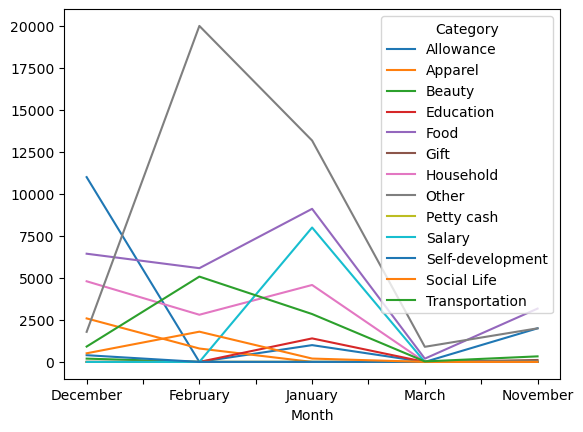

In [111]:
category=exp.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0)
display(category)
category.plot()

Income/Expense,Expense,Income
Month,,
December,16334.44,12310.0
February,17864.65,18200.0
January,20679.51,19641.0
March,525.00,600.0
November,3620.40,4003.0


<Axes: xlabel='Month'>

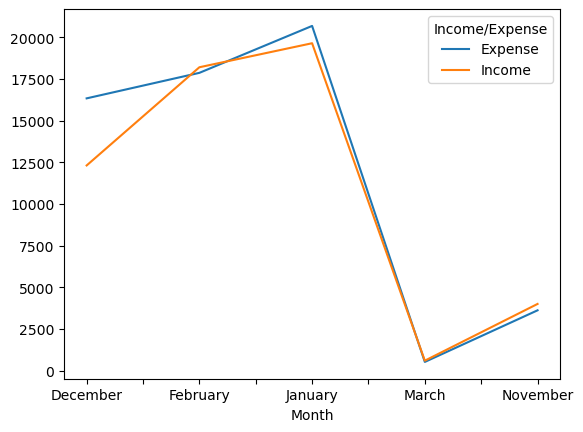

In [110]:
inc_exp=exp.pivot_table(index="Month",columns="Income/Expense",values="INR",aggfunc="sum",fill_value=0)
display(inc_exp)
inc_exp.plot()


Account,CUB - online payment,Cash
Month,,
December,27523.72,1120.72
February,36064.65,0.00
January,40320.51,0.00
March,1125.00,0.00
November,7623.40,0.00


<Axes: xlabel='Month'>

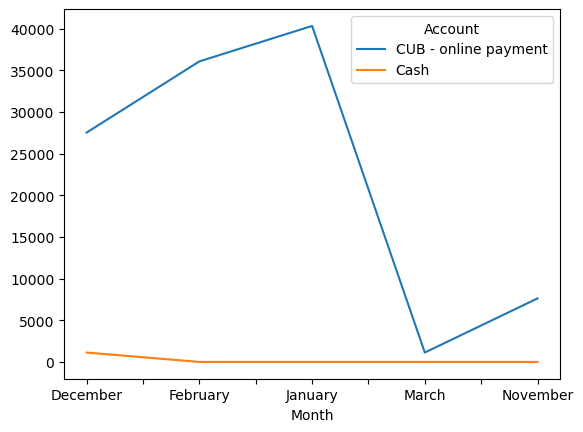

In [109]:
account= exp.pivot_table(index="Month",columns="Account",values="INR",aggfunc="sum",fill_value=0)
display(account)
account.plot()